In [1]:
from langgraph.graph import StateGraph, START, END 
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from typing import TypedDict
import os
from dotenv import load_dotenv 

In [2]:
load_dotenv(dotenv_path= r'C:\Users\shekh\OneDrive\Desktop\LangGraph_tut\myenv\.env')

True

In [15]:
HF_TOKEN = os.getenv("HUGGINGFACEHUB_API_TOKEN")


In [4]:
llm = HuggingFaceEndpoint(
    repo_id= 'mistralai/Mistral-7B-Instruct-v0.3',
    task='text-generation',
    huggingfacehub_api_token= HF_TOKEN
)

model = ChatHuggingFace(llm = llm)      

c:\Users\shekh\OneDrive\Desktop\LangGraph_tut\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
## defing the state
class Blog_state(TypedDict):
    title: str
    outline: str
    content: str

In [6]:
def generate_outline(state: Blog_state) -> Blog_state:
    """Generate a blog outline based on the title in the state."""
    title = state['title']
    prompt = f"Generate a detailed outline for a blog post titled: {title}"
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

In [7]:
def generate_blog(state: Blog_state) -> Blog_state:
    """Generate a blog post based on the outline in the state."""
    outline = state['outline']
    title = state['title']
    prompt = f"Write a detailed blog post on the title: {title} based on the following outline: {outline}"
    content = model.invoke(prompt).content
    state['content'] = content
    return state

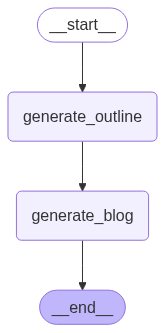

In [9]:
graph = StateGraph(Blog_state)

graph.add_node('generate_outline', generate_outline)
graph.add_node('generate_blog', generate_blog)

graph.add_edge(START, 'generate_outline')
graph.add_edge('generate_outline', 'generate_blog')
graph.add_edge('generate_blog', END)

## compile the graph
workflow = graph.compile()
workflow

In [10]:
initial_state = {'title': "The title is: The Future of AI in Everyday Life"}
final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'The title is: The Future of AI in Everyday Life', 'outline': 'Title: The Future of AI in Everyday Life\n\nI. Introduction\n   A. Brief overview of the current state of AI\n   B. Explanation of the focus on everyday life\n\nII. The Impact of AI Today\n   A. Examples of AI in daily life (smartphones, voice assistants, etc.)\n   B. Discussion on how AI improves efficiency and convenience\n   C. The limitations and challenges of current AI technology\n\nIII. The Evolution of AI\n   A. Explanation of the advancements in AI research\n   B. Discussion on the trends shaping the future of AI (machine learning, deep learning, neural networks, etc.)\n\nIV. The Potential Future of AI in Everyday Life\n   A. Predictions for how AI will integrate into daily life (smart homes, healthcare, education, transportation, etc.)\n   B. Analysis of the potential benefits and drawbacks\n   C. Discussion on ethical considerations (data privacy, bias, job displacement, etc.)\n\nV. Conclusion\n   A. Re

In [11]:
print(final_state['outline'])

Title: The Future of AI in Everyday Life

I. Introduction
   A. Brief overview of the current state of AI
   B. Explanation of the focus on everyday life

II. The Impact of AI Today
   A. Examples of AI in daily life (smartphones, voice assistants, etc.)
   B. Discussion on how AI improves efficiency and convenience
   C. The limitations and challenges of current AI technology

III. The Evolution of AI
   A. Explanation of the advancements in AI research
   B. Discussion on the trends shaping the future of AI (machine learning, deep learning, neural networks, etc.)

IV. The Potential Future of AI in Everyday Life
   A. Predictions for how AI will integrate into daily life (smart homes, healthcare, education, transportation, etc.)
   B. Analysis of the potential benefits and drawbacks
   C. Discussion on ethical considerations (data privacy, bias, job displacement, etc.)

V. Conclusion
   A. Recap of the potential future of AI in everyday life
   B. Closing thoughts on the importance of

In [13]:
print(final_state['content'])

Title: The Future of AI in Everyday Life

I. Introduction
   A. Brief overview of the current state of AI
      The current state of AI is rapidly evolving, with advancements being made daily. It is no longer relegated to the realm of science fiction, but has become an integral part of our daily lives.
   B. Explanation of the focus on everyday life
      In this discussion, we will focus on the future of AI as it pertains to our everyday lives.

II. The Impact of AI Today
   A. Examples of AI in daily life (smartphones, voice assistants, etc.)
      AI is all around us in our daily lives. From the smartphone in our pocket to the voice assistant in our home, AI has become a common tool.
   B. Discussion on how AI improves efficiency and convenience
      AI technology has revolutionized efficiency and convenience in various ways. For example, smartphones use AI to suggest apps or articles that the user may find interesting, while voice assistants can control smart home devices or answe